# Session and Study Similarity
* Session similarity for all five studies
* Study Similarity
    * Fall 2017 to Fall 2018 (Cross-Sample)
    * Spring 2018 to Spring 2019 to Fall 2019 (Cross-Sample)
    * Fall 2017 to Spring 2018 (Cross-Setting)
    * Fall 2018 to Spring 2019 (Cross-Setting)

In [2]:
import pandas as pd
from scipy import spatial
from openpyxl import load_workbook
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [3]:
clean_filepath = "/Users/kylieleblancKylie/domino/docsim/data/clean/"
table_filepath = "/Users/kylieleblancKylie/domino/docsim/results/"

In [5]:
docs = pd.read_csv(clean_filepath + 'text_transcripts.csv')
docs = docs.set_index('doc')
docs.sample(5)

,text,year,semester,scenario
doc,,,,
67_c_Transcript.docx,How do you feel? Good. Good. So what ...,2017-18,fall,feedback
76_c_Transcript.docx,How do you think that went? Okay. What ...,2017-18,fall,feedback
78_c_Transcript.docx,"What do you think? Yeah, once we get th...",2017-18,fall,feedback
01_1920_05_085_22C_Transcript.docx,"So, how do you feel that went? How so? ...",2019-20,fall,behavior
2018_100_3C_Transcript.docx,Okay so let’s get started. So how are you ...,2018-19,fall,feedback


In [4]:
def within_study_mean(df, semester, year, matrix):
    for maindoc in list(df[(docs.year == year) & (df.semester == semester)].index):
        pairwise_sim = []
        for doc in list(df[(docs.year == year) & (df.semester == semester)].index):
            sim = 1 - spatial.distance.cosine(matrix.loc[maindoc], matrix.loc[doc])
            pairwise_sim.append(sim)
        average = (sum(pairwise_sim) - 1)/(len(pairwise_sim) - 1) # don't include relationship with self
        df.at[maindoc, 'within_study'] = average
    return df

In [5]:
def across_year_mean(df, semester, year, matrix):
    for maindoc in list(df[(docs.year == year) & (df.semester == semester)].index):
        pairwise_sim = []
        for doc in list(df[(docs.year != year) & (df.semester == semester)].index):
            sim = 1 - spatial.distance.cosine(matrix.loc[maindoc], matrix.loc[doc])
            pairwise_sim.append(sim)
        average = (sum(pairwise_sim))/(len(pairwise_sim))
        df.at[maindoc, 'across_year'] = average
    return df

In [6]:
def across_semester_mean(df, semester, year, matrix):
    for maindoc in list(df[(docs.year == year) & (df.semester == semester)].index):
        pairwise_sim = []
        for doc in list(df[(docs.year == year) & (df.semester != semester)].index):
            sim = 1 - spatial.distance.cosine(matrix.loc[maindoc], matrix.loc[doc])
            pairwise_sim.append(sim)
        average = (sum(pairwise_sim))/(len(pairwise_sim))
        df.at[maindoc, 'across_semester'] = average
    return df

In [7]:
file = table_filepath + 'Spring 2018 Results.xlsx'
wb = load_workbook(file)
ws = wb.active

# No pre-processing

In [8]:
results_corpus = docs.copy()
results_corpus.sample()

,text,year,semester
doc,,,
2019_74_5C_Transcript.docx,"All right. So firstly, how do you think it...",2018-19,spring


In [9]:
matrix_corpus = pd.read_csv(clean_filepath + 'matrix_corpus.csv')
matrix_corpus = matrix_corpus.set_index('doc')
matrix_corpus.sample(5)

,10,100,12,15,16,20,29,30,40,7th,...,york,you,young,younger,your,yours,yourself,yup,zen,zone
doc,,,,,,,,,,,,,,,,,,,,,
65-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,30,0,0,6,0,0,0,0,0
55-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,49,0,0,6,0,0,0,0,0
2019_54_5C_Transcript.docx,0,0,0,0,0,0,0,0,0,0,...,0,48,0,0,9,0,0,0,0,0
7-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,51,0,0,6,0,0,0,0,0
73-2C.docx,0,0,0,0,0,0,0,2,0,0,...,0,49,0,0,3,0,0,0,0,0


## Within-study stability

In [10]:
#within_study_mean(results_corpus, 'spring', '2017-18', matrix_corpus)
#within_study_mean(results_corpus, 'fall', '2018-19', matrix_corpus)
within_study_mean(results_corpus, 'spring', '2018-19', matrix_corpus)
value = results_corpus[(results_corpus.year == '2018-19')
                    & (results_corpus.semester == 'spring')].within_study.mean().round(2)
print(value)
ws.cell(row= 2, column= 2).value = value
wb.save(file)
results_corpus.sample(5)

0.84


,text,year,semester,within_study
doc,,,,
2019_25_5C_Transcript.docx,"So, how do you feel about that first go in ...",2018-19,spring,0.871281
123-2C.docx,"Um, so how do you feel about that first simu...",2017-18,spring,NaN
2018_97_3C_Transcript.docx,"All right, take a deep breath. All righ...",2018-19,fall,NaN
2018_87_3C_Transcript.docx,"Alright deep breath, it’s over. How do you ...",2018-19,fall,NaN
102-2C.docx,"Okay. Yeah, you want-- Yeah. So, general...",2017-18,spring,NaN


## Across-population stability

In [63]:
across_year_mean(results_corpus, 'spring', '2018-19', matrix_corpus)
value = results_corpus[(results_corpus.year == '2018-19')
                    & (results_corpus.semester == 'spring')].across_year.mean().round(2)
print(value)
ws.cell(row= 4, column= 2).value = value
wb.save(file)
results_corpus.sample(5)

0.8


,text,year,semester,within_study,across_year
doc,,,,,
2019_77_5C_Transcript.docx,All right. So take a seat. I’m sorry to i...,2018-19,spring,0.873735,0.820308
2018_56_3C Transcript.docx,So how do you think the first one went? ...,2018-19,fall,NaN,NaN
2019_42_5C_Transcript.docx,"Aside from terrible, before I tell you my fe...",2018-19,spring,0.852004,0.804321
2018_44_3C_Transcript.docx,"So, I’m supposed to ask you how you feel but...",2018-19,fall,NaN,NaN
26-2C.docx,"Alright, so how do you think that went? Ye...",2017-18,spring,NaN,NaN


## Across Setting

In [64]:
across_semester_mean(results_corpus, 'spring', '2018-19', matrix_corpus)
value = results_corpus[(results_corpus.year == '2018-19')
                    & (results_corpus.semester == 'spring')].across_semester.mean().round(2)
print(value)
ws.cell(row= 6, column= 2).value = value
wb.save(file)
results_corpus.sample(5)

0.78


,text,year,semester,within_study,across_year,across_semester
doc,,,,,,
2019_77_5C_Transcript.docx,All right. So take a seat. I’m sorry to i...,2018-19,spring,0.873735,0.820308,0.810212
103-2C.docx,All right. Why don't you have a sit and we'l...,2017-18,spring,NaN,NaN,NaN
2019_42_5C_Transcript.docx,"Aside from terrible, before I tell you my fe...",2018-19,spring,0.852004,0.804321,0.780974
109-2C.docx,How do you feel about that? The first one-- ...,2017-18,spring,NaN,NaN,NaN
2018_82_3C_Transcript.docx,so how are you feeling the first time ? ...,2018-19,fall,NaN,NaN,NaN


# Remove stop words

In [65]:
results_corpus_stop = docs.copy()
results_corpus_stop.sample()

,text,year,semester
doc,,,
2018_55_3C_Transcript.docx,"Okay, so uhm how do you feel about the simu...",2018-19,fall


In [66]:
matrix_corpus_stop = pd.read_csv(clean_filepath + 'matrix_corpus_stop.csv')
matrix_corpus_stop = matrix_corpus_stop.set_index('doc')
matrix_corpus_stop.sample(5)

,10,100,12,15,16,20,29,30,40,7th,...,yes,yesterday,yet,yo,york,young,younger,yup,zen,zone
doc,,,,,,,,,,,,,,,,,,,,,
14-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018_109_3C_Transcript.docx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018_98_3C_Transcript.docx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
within_study_mean(results_corpus_stop, 'spring', '2018-19', matrix_corpus_stop)
value = results_corpus_stop[(results_corpus_stop.year == '2018-19')
                    & (results_corpus_stop.semester == 'spring')].within_study.mean().round(2)
print(value)
ws.cell(row= 2, column= 3).value = value
wb.save(file)
results_corpus_stop.sample(5)

0.52


,text,year,semester,within_study
doc,,,,
2018_48_3C_Transcript.docx,"Alright, so I'm going to set this for five ...",2018-19,fall,NaN
2018_53_3C_Transcript.docx,All right. I’ll just adjust all my notes he...,2018-19,fall,NaN
2019_62_5C_Transcript.docx,"Yes. Hello. So, how are you feeling ab...",2018-19,spring,0.539586
2019_77_5C_Transcript.docx,All right. So take a seat. I’m sorry to i...,2018-19,spring,0.546705
2018_112_3C_Transcript.docx,But I’d love to hear from you how felt the ...,2018-19,fall,NaN


In [68]:
across_year_mean(results_corpus_stop, 'spring', '2018-19', matrix_corpus_stop)
value = results_corpus_stop[(results_corpus_stop.year == '2018-19')
                    & (results_corpus_stop.semester == 'spring')].across_year.mean().round(2)
print(value)
ws.cell(row= 4, column= 3).value = value
wb.save(file)
results_corpus.sample(5)

0.47


,text,year,semester,within_study,across_year,across_semester
doc,,,,,,
110-2C.docx,So how do you feel? how did you get - It w...,2017-18,spring,NaN,NaN,NaN
115-2C.docx,"And so, how do you feel about that one? Mm...",2017-18,spring,NaN,NaN,NaN
2018_87_3C_Transcript.docx,"Alright deep breath, it’s over. How do you ...",2018-19,fall,NaN,NaN,NaN
61-2C.docx,"Um, how are you feeling about that first run...",2017-18,spring,NaN,NaN,NaN
108-2C.docx,"So how you-how you feel, what do you think? ...",2017-18,spring,NaN,NaN,NaN


In [69]:
across_semester_mean(results_corpus_stop, 'spring', '2018-19', matrix_corpus_stop)
value = results_corpus_stop[(results_corpus_stop.year == '2018-19')
                    & (results_corpus_stop.semester == 'spring')].across_semester.mean().round(2)
print(value)
ws.cell(row= 6, column= 3).value = value
wb.save(file)
results_corpus.sample(5)

0.39


,text,year,semester,within_study,across_year,across_semester
doc,,,,,,
2019_94_5C_Transcript.docx,"Well, how do you think that? I've got note...",2018-19,spring,0.829648,0.785176,0.786281
2018_56_3C Transcript.docx,So how do you think the first one went? ...,2018-19,fall,NaN,NaN,NaN
52-2C.docx,"All right. So Danielle, how are you feeling ...",2017-18,spring,NaN,NaN,NaN
2018_26_3C_Transcript.docx,Okay. Uhm how do you feel about simulation?...,2018-19,fall,NaN,NaN,NaN
2019_101_5C_Transcript.docx,"Hello. Okay, so how do you think at first ...",2018-19,spring,0.849933,0.807219,0.828187


# Stop and Stem

In [70]:
results_corpus_stop_stem = docs.copy()
results_corpus_stop_stem.sample()

matrix_corpus_stop_stem = pd.read_csv(clean_filepath + 'matrix_corpus_stop_stem.csv')
matrix_corpus_stop_stem = matrix_corpus_stop_stem.set_index('doc')
matrix_corpus_stop_stem.sample(5)

within_study_mean(results_corpus_stop_stem, 'spring', '2018-19', matrix_corpus_stop_stem)
value = results_corpus_stop_stem[(results_corpus_stop_stem.year == '2018-19')
                    & (results_corpus_stop_stem.semester == 'spring')].within_study.mean().round(2)
print(value)
ws.cell(row= 2, column= 4).value = value
wb.save(file)
results_corpus_stop_stem.sample(5)

across_year_mean(results_corpus_stop_stem, 'spring', '2018-19', matrix_corpus_stop_stem)
value = results_corpus_stop_stem[(results_corpus_stop_stem.year == '2018-19')
                    & (results_corpus_stop_stem.semester == 'spring')].across_year.mean().round(2)
print(value)
ws.cell(row= 4, column= 4).value = value
wb.save(file)
results_corpus.sample(5)

across_semester_mean(results_corpus_stop_stem, 'spring', '2018-19', matrix_corpus_stop_stem)
value = results_corpus_stop_stem[(results_corpus_stop_stem.year == '2018-19')
                    & (results_corpus_stop_stem.semester == 'spring')].across_semester.mean().round(2)
print(value)
ws.cell(row= 6, column= 4).value = value
wb.save(file)
results_corpus.sample(5)

0.96
0.95
0.94


,text,year,semester,within_study,across_year,across_semester
doc,,,,,,
2018_45_3C Transcript.docx,How do you think the first simulation went?...,2018-19,fall,NaN,NaN,NaN
2019_97_5C_Transcript.docx,I can tell that you’re a little bit frustrat...,2018-19,spring,0.849246,0.81216,0.804595
2018_118_3C_Transcript.docx,"So, how do you feel about that first simula...",2018-19,fall,NaN,NaN,NaN
2018_75_3C_Transcript.docx,"All right. So, how do you feel about it? ...",2018-19,fall,NaN,NaN,NaN
2018_95_3C_Transcript.docx,"So, how did you feel about that? Okay. ...",2018-19,fall,NaN,NaN,NaN


# Stop Stem Weight

In [71]:
results_corpus_stop_stem_wgt = docs.copy()
results_corpus_stop_stem_wgt.sample()

matrix_corpus_stop_stem_wgt = pd.read_csv(clean_filepath + 'matrix_corpus_stop_stem_wgt.csv')
matrix_corpus_stop_stem_wgt = matrix_corpus_stop_stem_wgt.set_index('doc')
matrix_corpus_stop_stem_wgt.sample(5)

within_study_mean(results_corpus_stop_stem_wgt, 'spring', '2018-19', matrix_corpus_stop_stem_wgt)
value = results_corpus_stop_stem_wgt[(results_corpus_stop_stem_wgt.year == '2018-19')
                    & (results_corpus_stop_stem_wgt.semester == 'spring')].within_study.mean().round(2)
print(value)
ws.cell(row= 2, column= 5).value = value
wb.save(file)
results_corpus_stop_stem_wgt.sample(5)

across_year_mean(results_corpus_stop_stem_wgt, 'spring', '2018-19', matrix_corpus_stop_stem_wgt)
value = results_corpus_stop_stem_wgt[(results_corpus_stop_stem_wgt.year == '2018-19')
                    & (results_corpus_stop_stem_wgt.semester == 'spring')].across_year.mean().round(2)
print(value)
ws.cell(row= 4, column= 5).value = value
wb.save(file)
results_corpus.sample(5)

across_semester_mean(results_corpus_stop_stem_wgt, 'spring', '2018-19', matrix_corpus_stop_stem_wgt)
value = results_corpus_stop_stem_wgt[(results_corpus_stop_stem_wgt.year == '2018-19')
                    & (results_corpus_stop_stem_wgt.semester == 'spring')].across_semester.mean().round(2)
print(value)
ws.cell(row= 6, column= 5).value = value
wb.save(file)
results_corpus.sample(5)

0.83
0.82
0.78


,text,year,semester,within_study,across_year,across_semester
doc,,,,,,
108-2C.docx,"So how you-how you feel, what do you think? ...",2017-18,spring,NaN,NaN,NaN
2019_66_5C_Transcript.docx,"All right, so how do you think that went? ...",2018-19,spring,0.828004,0.812570,0.781485
2019_49_5C_Transcript.docx,What did you think about the first simulatio...,2018-19,spring,0.844601,0.812696,0.804254
2019_16_5C_TC Transcript.docx,"So, first thing is talk to me about what yo...",2018-19,spring,0.859980,0.811086,0.807054
60-2C.docx,How do you feel about that first one? Yeah...,2017-18,spring,NaN,NaN,NaN


# LSA

In [72]:
results_corpus_lsa = docs.copy()
results_corpus_lsa.sample()

matrix_corpus = pd.read_csv(clean_filepath + 'matrix_corpus.csv')
matrix_corpus = matrix_corpus.set_index('doc')
matrix_corpus.sample(5)

,10,100,12,15,16,20,29,30,40,7th,...,york,you,young,younger,your,yours,yourself,yup,zen,zone
doc,,,,,,,,,,,,,,,,,,,,,
26-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,58,0,0,4,0,0,0,0,0
49-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,56,0,0,2,0,0,0,0,0
14-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,45,0,0,0,0,0,0,0,0
115-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,62,0,0,3,0,0,0,0,0
2018_98_3C_Transcript.docx,0,0,0,0,0,0,0,0,0,0,...,0,38,0,0,2,0,0,0,0,0


In [73]:
lsa = TruncatedSVD(n_components = 100, random_state = 100)
lsa_fit = lsa.fit_transform(matrix_corpus)
lsa_fit = Normalizer(copy=False).fit_transform(lsa_fit)
print(lsa_fit.shape)
lsa_fit

(160, 100)


array([[ 8.99962893e-01, -2.36338953e-01, -9.38188636e-02, ...,
        -1.44964545e-02,  8.17606379e-03, -2.40714966e-02],
       [ 8.91250049e-01, -2.38774501e-01, -2.09411255e-01, ...,
         5.92604663e-03,  6.77125366e-03,  2.68886340e-05],
       [ 8.64255603e-01, -2.86840037e-01, -1.53910181e-01, ...,
        -3.81151702e-03, -9.50499902e-03,  1.79697067e-02],
       ...,
       [ 9.26260580e-01,  6.62828367e-02, -1.68048040e-01, ...,
        -3.54741980e-02,  1.03752271e-02, -1.23010515e-02],
       [ 9.50004119e-01,  8.08991624e-03, -8.55091645e-02, ...,
        -4.01917749e-02,  1.69323257e-04,  3.88936111e-02],
       [ 8.98285146e-01,  1.40149528e-02,  1.81253997e-01, ...,
         2.63584743e-03,  7.28505664e-03, -7.00473731e-03]])

In [74]:
## Each LSA component is a linear combo of words
word_weights = pd.DataFrame(lsa.components_, columns = matrix_corpus.columns)
word_weights.head()

,10,100,12,15,16,20,29,30,40,7th,...,york,you,young,younger,your,yours,yourself,yup,zen,zone
0,0.000066,0.000162,0.000150,0.000069,0.000088,0.000430,0.000090,0.000498,0.000110,0.000086,...,0.000140,0.546804,0.000093,0.000374,0.039962,0.000159,0.001327,0.000498,0.000095,0.000284
1,0.000087,-0.001293,-0.000013,-0.000260,-0.000093,0.000526,-0.000770,0.001079,0.000868,0.000817,...,-0.000877,0.237798,-0.000078,0.002696,0.025891,0.000498,0.003940,0.000315,-0.000091,0.000009
2,0.000725,-0.001200,-0.000866,-0.000241,0.000731,0.000022,-0.000217,0.000558,-0.000395,-0.001201,...,-0.000908,0.418684,-0.000108,-0.002696,0.060095,0.000162,-0.001134,0.002917,0.000892,0.002233
3,-0.000288,-0.000251,-0.000799,-0.000476,0.000479,0.001327,-0.000554,0.000357,-0.000100,-0.000049,...,-0.000342,0.014769,0.001162,-0.001706,-0.055486,-0.000034,-0.002035,-0.001088,0.000562,0.001490
4,0.000404,-0.000296,0.000232,0.000983,-0.001368,0.000397,0.000615,-0.001105,0.000351,-0.000672,...,0.001480,0.286021,0.000236,-0.001868,-0.021174,-0.000385,0.004614,-0.000124,-0.000751,0.000398


In [75]:
## Each document is a linear combination of components
matrix_corpus_lsa = pd.DataFrame(lsa_fit, index = matrix_corpus.index, columns = word_weights.index)
matrix_corpus_lsa.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
doc,,,,,,,,,,,,,,,,,,,,,
2019_35_5C_Transcript.docx,0.867432,0.298707,-0.167954,0.097259,-0.145014,0.034105,-0.149850,0.037641,0.003956,0.018760,...,-0.007147,-0.026342,0.029942,-0.018978,-0.019716,-0.017001,-0.014398,0.008370,0.013545,0.000395
86-2C.docx,0.928016,0.192343,-0.079218,-0.053575,0.062078,-0.016687,0.040797,-0.026981,0.051317,-0.003957,...,0.021674,0.011898,0.002751,0.009913,0.011011,0.003778,0.015981,-0.016941,-0.032385,0.010993
38-2C.docx,0.902481,0.025867,0.264608,0.026202,0.005370,-0.122898,-0.032001,0.113441,-0.035543,-0.062682,...,0.009344,-0.011250,0.004863,0.007265,0.015583,0.012134,0.005570,-0.004890,-0.003926,0.019425
45-2C.docx,0.928529,0.052426,-0.010337,-0.096618,0.073066,0.069417,0.049735,-0.108909,-0.052101,0.079675,...,0.020238,0.020472,-0.007130,0.009504,0.008507,-0.021509,-0.029551,-0.008952,0.016403,-0.011742
42-2C.docx,0.879757,0.028326,0.151536,-0.097382,0.033922,0.269599,0.047727,-0.065953,-0.027249,-0.047204,...,0.000437,-0.006241,0.050825,0.026954,-0.022594,0.011659,-0.010567,0.028149,0.005398,0.021307


In [79]:
within_study_mean(results_corpus_lsa, 'spring', '2018-19', matrix_corpus_lsa)
value = results_corpus_lsa[(results_corpus_lsa.year == '2018-19')
                    & (results_corpus_lsa.semester == 'spring')].within_study.mean().round(2)
print(value)
ws.cell(row= 2, column= 6).value = value
wb.save(file)
results_corpus_lsa.sample(5)

across_year_mean(results_corpus_lsa, 'spring', '2018-19', matrix_corpus_lsa)
value = results_corpus_lsa[(results_corpus_lsa.year == '2018-19')
                    & (results_corpus_lsa.semester == 'spring')].across_year.mean().round(2)
print(value)
ws.cell(row= 4, column= 6).value = value
wb.save(file)

across_semester_mean(results_corpus_lsa, 'spring', '2018-19', matrix_corpus_lsa)
value = results_corpus_lsa[(results_corpus_lsa.year == '2018-19')
                    & (results_corpus_lsa.semester == 'spring')].across_semester.mean().round(2)
print(value)
ws.cell(row= 6, column= 6).value = value
wb.save(file)
results_corpus_lsa.sample(5)

0.85
0.81
0.79


,text,year,semester,within_study,across_year,across_semester
doc,,,,,,
2018_13_3C_Transcript.docx,So how do you think the simulation went? ...,2018-19,fall,NaN,NaN,NaN
13-2C.docx,Alright. So how did you feel about that? W...,2017-18,spring,NaN,NaN,NaN
116-2C.docx,So how do you feel about that first one? Y...,2017-18,spring,NaN,NaN,NaN
2018_112_3C_Transcript.docx,But I’d love to hear from you how felt the ...,2018-19,fall,NaN,NaN,NaN
111-2C.docx,So how do you feel of that? Not great? Wel...,2017-18,spring,NaN,NaN,NaN


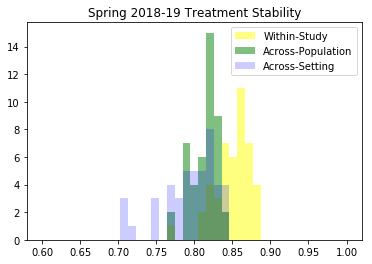

In [89]:
bins = np.linspace(0.6, 1, num = 40)
plt.hist(results_corpus_lsa.within_study, bins, color = "yellow", label = "Within-Study", alpha = .5)
plt.hist(results_corpus_lsa.across_year, bins, color = "green", label = "Across-Population", alpha = .5)
plt.hist(results_corpus_lsa.across_semester, bins, color = "blue", label = "Across-Setting", alpha = .2)
plt.legend()
plt.title("Spring 2018-19 Treatment Stability")
plt.savefig(table_filepath + "spring2019_stability_hist.png")

plt.show()

# LSA and Weighting

In [77]:
results_corpus_wgt_lsa = docs.copy()
results_corpus_wgt_lsa.sample()

matrix_corpus_wgt = pd.read_csv(clean_filepath + 'matrix_corpus_wgt.csv')
matrix_corpus_wgt = matrix_corpus_wgt.set_index('doc')
matrix_corpus_wgt.sample(5)

lsa = TruncatedSVD(n_components = 100, random_state = 100)
lsa_fit = lsa.fit_transform(matrix_corpus_wgt)
lsa_fit = Normalizer(copy=False).fit_transform(lsa_fit)
print(lsa_fit.shape)
lsa_fit

## Each LSA component is a linear combo of words
word_weights = pd.DataFrame(lsa.components_, columns = matrix_corpus_wgt.columns)
word_weights.head()

## Each document is a linear combination of components
matrix_corpus_wgt_lsa = pd.DataFrame(lsa_fit, index = matrix_corpus_wgt.index, columns = word_weights.index)
matrix_corpus_wgt_lsa.sample(5)

within_study_mean(results_corpus_wgt_lsa, 'spring', '2018-19', matrix_corpus_wgt_lsa)
value = results_corpus_wgt_lsa[(results_corpus_wgt_lsa.year == '2018-19')
                    & (results_corpus_wgt_lsa.semester == 'spring')].within_study.mean().round(2)
print(value)
ws.cell(row= 2, column= 7).value = value
wb.save(file)

across_year_mean(results_corpus_wgt_lsa, 'spring', '2018-19', matrix_corpus_wgt_lsa)
value = results_corpus_wgt_lsa[(results_corpus_wgt_lsa.year == '2018-19')
                    & (results_corpus_wgt_lsa.semester == 'spring')].across_year.mean().round(2)
print(value)
ws.cell(row= 4, column= 7).value = value
wb.save(file)

across_semester_mean(results_corpus_wgt_lsa, 'spring', '2018-19', matrix_corpus_wgt_lsa)
value = results_corpus_wgt_lsa[(results_corpus_wgt_lsa.year == '2018-19')
                    & (results_corpus_wgt_lsa.semester == 'spring')].across_semester.mean().round(2)
print(value)
ws.cell(row= 6, column= 7).value = value
wb.save(file)
results_corpus.sample(5)

(160, 100)
0.71
0.65
0.6


,text,year,semester,within_study,across_year,across_semester
doc,,,,,,
2019_91_5C_Transcript.docx,"I thought you did great, so you don’t need t...",2018-19,spring,0.865784,0.821414,0.791429
2018_95_3C_Transcript.docx,"So, how did you feel about that? Okay. ...",2018-19,fall,NaN,NaN,NaN
2018_90_3C_Transcript.docx,"So, UM how do you think that went? . It ...",2018-19,fall,NaN,NaN,NaN
78-2C.docx,"There's, like, a lot of clicking this. Um,...",2017-18,spring,NaN,NaN,NaN
2019_113_5C_Transcript.docx,"Okay. Hi, so how do you feel about the firs...",2018-19,spring,0.869318,0.825160,0.801157


# Stop, Weight, and LSA

In [78]:
results_corpus_stop_wgt_lsa = docs.copy()
results_corpus_stop_wgt_lsa.sample()

matrix_corpus_stop_wgt = pd.read_csv(clean_filepath + 'matrix_corpus_stop_wgt.csv')
matrix_corpus_stop_wgt = matrix_corpus_stop_wgt.set_index('doc')
matrix_corpus_stop_wgt.sample(5)

lsa = TruncatedSVD(n_components = 100, random_state = 100)
lsa_fit = lsa.fit_transform(matrix_corpus_stop_wgt)
lsa_fit = Normalizer(copy=False).fit_transform(lsa_fit)
print(lsa_fit.shape)
lsa_fit

## Each LSA component is a linear combo of words
word_weights = pd.DataFrame(lsa.components_, columns = matrix_corpus_stop_wgt.columns)
word_weights.head()

## Each document is a linear combination of components
matrix_corpus_stop_wgt_lsa = pd.DataFrame(lsa_fit, index = matrix_corpus_stop_wgt.index, columns = word_weights.index)
matrix_corpus_stop_wgt_lsa.sample(5)

within_study_mean(results_corpus_stop_wgt_lsa, 'spring', '2018-19', matrix_corpus_stop_wgt_lsa)
value = results_corpus_stop_wgt_lsa[(results_corpus_stop_wgt_lsa.year == '2018-19')
                    & (results_corpus_stop_wgt_lsa.semester == 'spring')].within_study.mean().round(2)
print(value)
ws.cell(row= 2, column= 8).value = value
wb.save(file)

across_year_mean(results_corpus_stop_wgt_lsa, 'spring', '2018-19', matrix_corpus_stop_wgt_lsa)
value = results_corpus_stop_wgt_lsa[(results_corpus_stop_wgt_lsa.year == '2018-19')
                    & (results_corpus_stop_wgt_lsa.semester == 'spring')].across_year.mean().round(2)
print(value)
ws.cell(row= 4, column= 8).value = value
wb.save(file)

across_semester_mean(results_corpus_stop_wgt_lsa, 'spring', '2018-19', matrix_corpus_stop_wgt_lsa)
value = results_corpus_stop_wgt_lsa[(results_corpus_stop_wgt_lsa.year == '2018-19')
                    & (results_corpus_stop_wgt_lsa.semester == 'spring')].across_semester.mean().round(2)
print(value)
ws.cell(row= 6, column= 8).value = value
wb.save(file)
results_corpus.sample(5)

(160, 100)
0.31
0.27
0.2


,text,year,semester,within_study,across_year,across_semester
doc,,,,,,
2019_74_5C_Transcript.docx,"All right. So firstly, how do you think it...",2018-19,spring,0.851562,0.814976,0.809485
1-2C.docx,So how do you feel about that first simulati...,2017-18,spring,NaN,NaN,NaN
69-2C.docx,"Um, so how did you feel about that? Yeah. ...",2017-18,spring,NaN,NaN,NaN
2019_106_5C_Transcript.docx,So tell me how you feel about your first si...,2018-19,spring,0.865817,0.827084,0.807318
88-2C.docx,"Um, so how are you feeling about that first ...",2017-18,spring,NaN,NaN,NaN
